In [1]:
import time

import cv2
import numpy as np
from PIL import Image

from yolo import YOLO, YOLO_ONNX

import os
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
yolo = YOLO()

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
logs/best_epoch_weights.pth model, and classes loaded.
Configurations:
----------------------------------------------------------------------
|                     keys |                                   values|
----------------------------------------------------------------------
|               model_path |              logs/best_epoch_weights.pth|
|             classes_path |                      model_data/ML_3.txt|
|             anchors_path |              model_data/yolo_anchors.txt|
|             anchors_mask |        [[6, 7, 8], [3, 4, 5], [0, 1, 2]]|
|              input_shape |                               [640, 640]|
|                      phi |                                        l|
|               confidence |                                      0.7|
|                  nms_iou |                                      0.7|
|          letterbox_image |                        

In [3]:
import easyocr
reader = easyocr.Reader(['ch_sim','en'])

In [4]:
def enhance_contrast(image, alpha, beta):
    # 对图像进行对比度增强
    enhanced_image = np.clip(alpha * np.array(image) + beta, 0, 255).astype(np.uint8)
    return enhanced_image
# 设置对比度增强的参数
alpha = 1.5  # 对比度增强因子
beta = 10 # 亮度增强因子

import re

def remove_special_characters(text):
    # 使用正则表达式匹配除了数字和英文字母之外的字符，并替换为空字符串
    cleaned_text = re.sub('[^A-Z0-9]', '', text)
    return cleaned_text

# 建立字典

In [5]:
char_set={}
ascii=65
digits=10
for i in range(26):
    if str(digits)[-1]==str(digits)[-2]:
        digits+=1
    char_set.update({chr(ascii):digits})
    ascii+=1
    digits+=1

In [24]:
def image_to_text(text):       
    #將辨識出的字組合在一起
    predict=''
    for i in text:
        predict+=i
    predict  

    # 過濾字串
    text=str.upper(predict)
    cleaned_text = remove_special_characters(text) 
    cleaned_text=cleaned_text[:10]
    # print(cleaned_text)

    #將字串轉成對應的數字，來預測第11個字
    container_text=[]
    for i in cleaned_text:
        if(str.isupper(i)):
            container_text.append(char_set[i])
        else:
            container_text.append(int(i))     

    #透過公式轉成對應的第11個數字
    sum=0
    for i in range(len(container_text)):
        sum+=container_text[i]*(2**i)
    number11=sum%11    
    if sum%11==10:
        number11=0
    cleaned_text+=str(number11)
    return cleaned_text      

# 对图像进行对比度增强
from PIL import ImageEnhance
def enhance_contrast(image, alpha, beta):   
    enhanced_image = np.clip(alpha * np.array(image) + beta, 0, 255).astype(np.uint8)
    return enhanced_image

# 设置对比度增强的参数
alpha = 1.5 # 对比度增强因子1.3 
beta = 30 # 亮度增强因子15

#使用正则表达式匹配除了数字和英文字母之外的字符，并替换为空字符串
import re
def remove_special_characters(text):
    cleaned_text = re.sub('[^A-Z0-9]', '', text)
    return cleaned_text

In [7]:
dir_origin_path='VOCdevkit/container/JPEGImages/測試集'

In [15]:
img_names[34]

'WHSU6856285.jpg'

  0%|          | 0/35 [00:00<?, ?it/s]

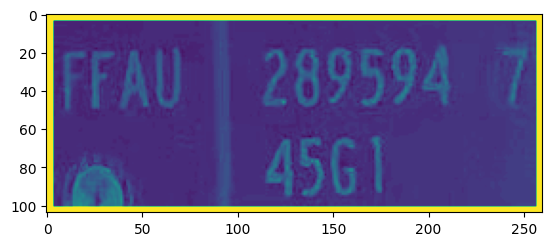

  3%|▎         | 1/35 [00:00<00:18,  1.81it/s]

FTNU2095946


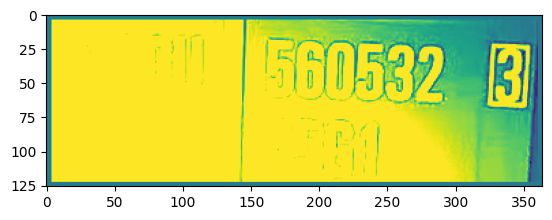

  6%|▌         | 2/35 [00:00<00:15,  2.10it/s]

B324


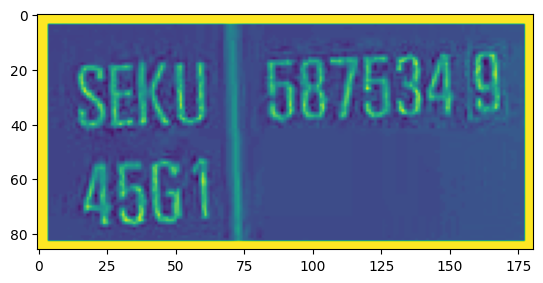

  9%|▊         | 3/35 [00:01<00:13,  2.34it/s]

SEKU5875349


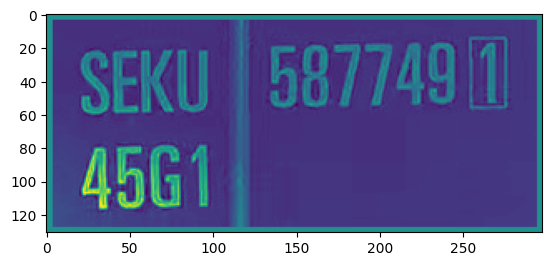

 11%|█▏        | 4/35 [00:01<00:13,  2.36it/s]

SEKU5877491


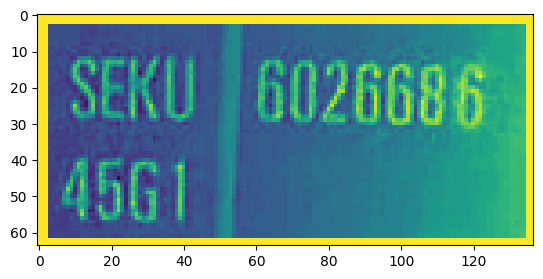

 14%|█▍        | 5/35 [00:02<00:12,  2.42it/s]

SEKU6026686


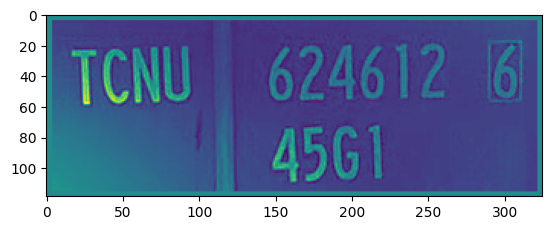

 17%|█▋        | 6/35 [00:02<00:11,  2.44it/s]

TCNU6246126


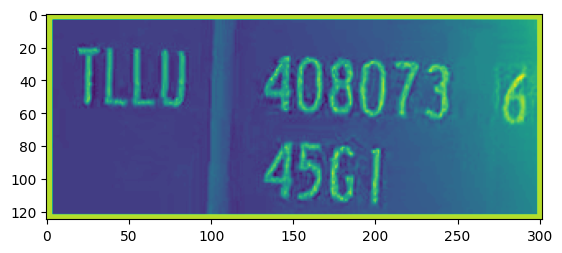

 20%|██        | 7/35 [00:03<00:12,  2.32it/s]

JU408073642


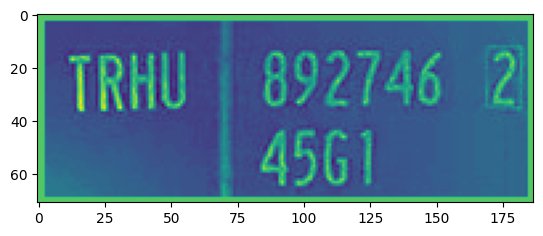

 23%|██▎       | 8/35 [00:03<00:12,  2.23it/s]

TRAIU892741


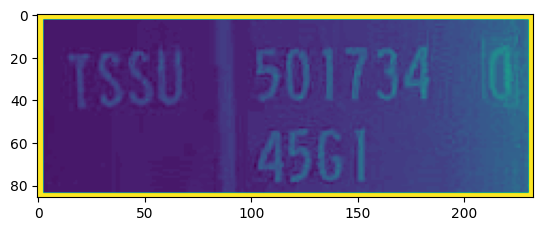

 26%|██▌       | 9/35 [00:03<00:11,  2.26it/s]

OM501739UO5


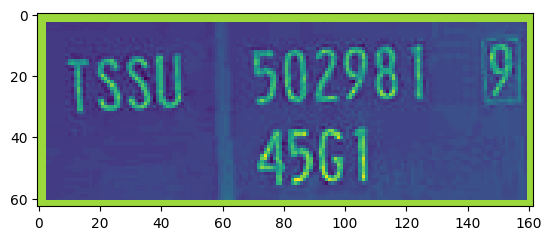

 29%|██▊       | 10/35 [00:04<00:10,  2.40it/s]

TSSU5029819


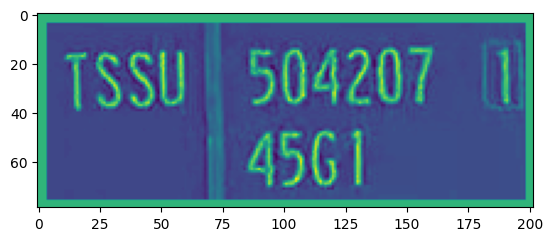

 31%|███▏      | 11/35 [00:04<00:10,  2.38it/s]

TSSU5042071


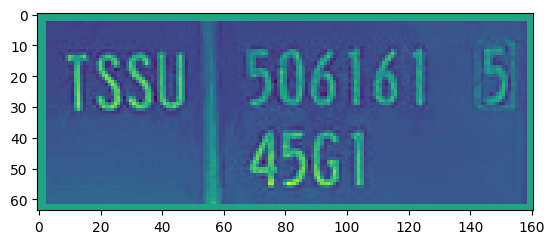

 34%|███▍      | 12/35 [00:05<00:08,  2.67it/s]

TSSU5061615


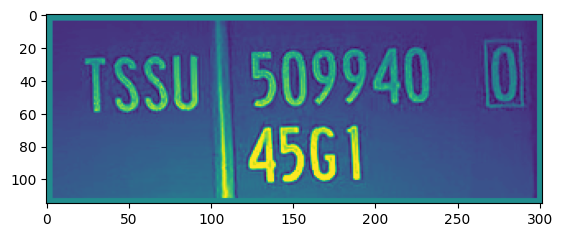

 37%|███▋      | 13/35 [00:05<00:08,  2.68it/s]

TSSU5099400


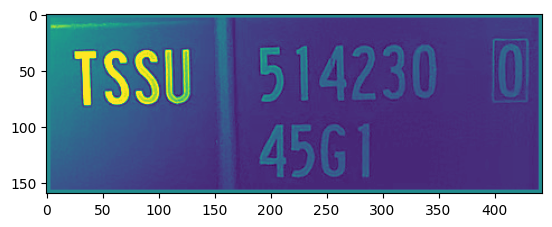

 40%|████      | 14/35 [00:05<00:07,  2.67it/s]

TSSU5142300


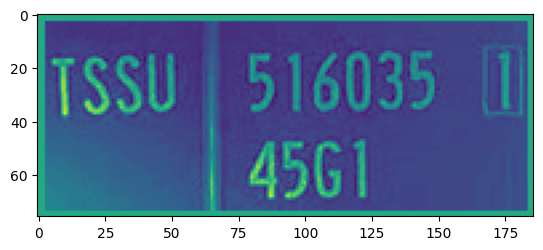

 43%|████▎     | 15/35 [00:06<00:07,  2.58it/s]

TSSU5160351


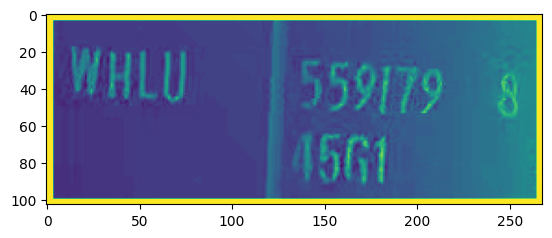

 46%|████▌     | 16/35 [00:06<00:08,  2.35it/s]

WIIUU559116


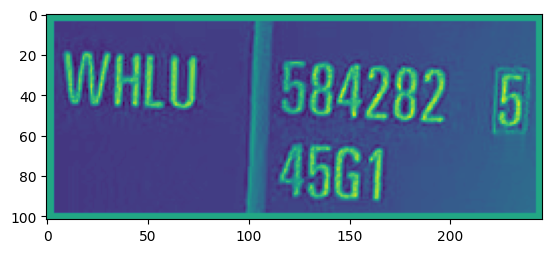

 49%|████▊     | 17/35 [00:07<00:07,  2.38it/s]

IWHLU584285


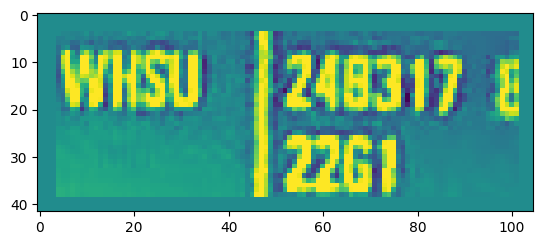

 51%|█████▏    | 18/35 [00:07<00:07,  2.41it/s]

ISU12017DA0


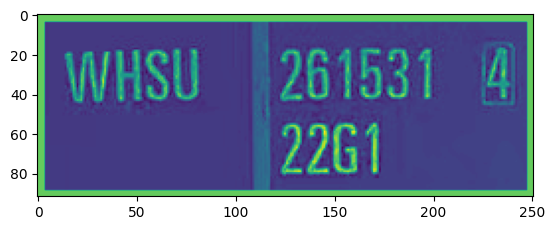

 54%|█████▍    | 19/35 [00:07<00:06,  2.51it/s]

WHSU2615314


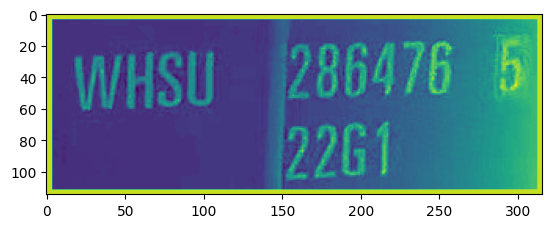

 57%|█████▋    | 20/35 [00:08<00:06,  2.33it/s]

WISU2864767


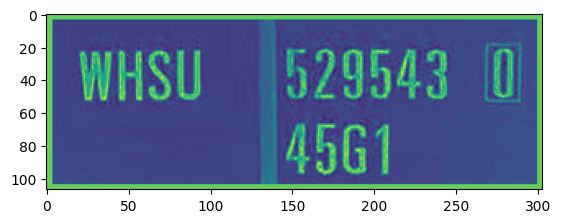

 60%|██████    | 21/35 [00:08<00:06,  2.29it/s]

W8U52954347


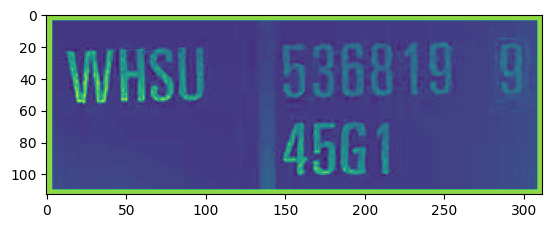

 63%|██████▎   | 22/35 [00:09<00:05,  2.29it/s]

WHSU5360198


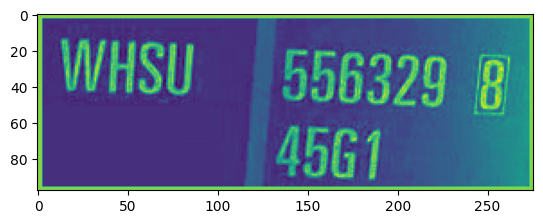

 66%|██████▌   | 23/35 [00:09<00:04,  2.45it/s]

WHSU5563298


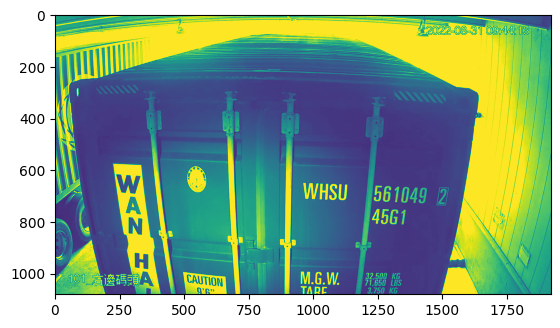

 69%|██████▊   | 24/35 [00:11<00:08,  1.26it/s]

L461WISU518


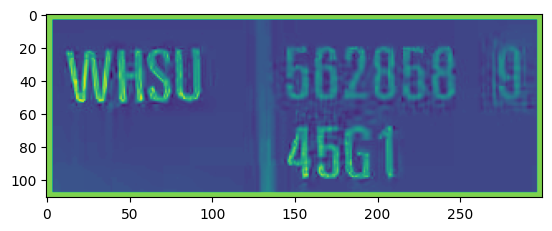

 71%|███████▏  | 25/35 [00:11<00:06,  1.44it/s]

WISU5620682


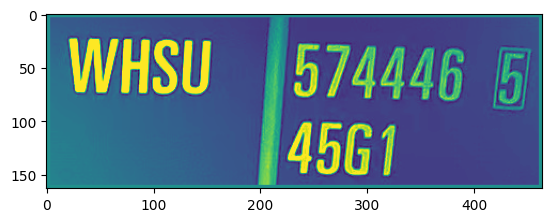

 74%|███████▍  | 26/35 [00:12<00:05,  1.54it/s]

WISU5744467


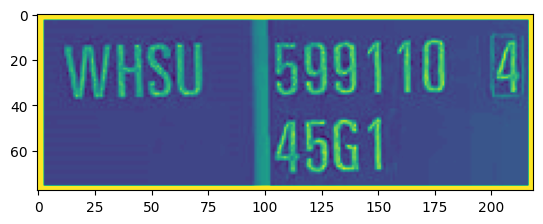

 77%|███████▋  | 27/35 [00:12<00:04,  1.76it/s]

WHSU5991104


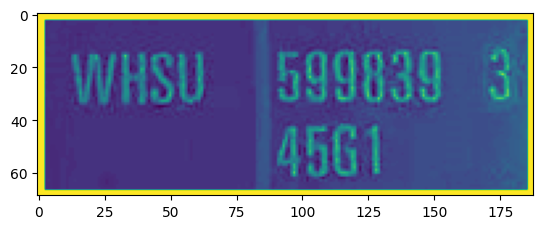

 80%|████████  | 28/35 [00:13<00:03,  1.87it/s]

WISU5990394


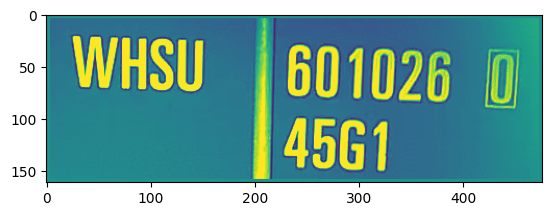

 83%|████████▎ | 29/35 [00:13<00:03,  1.92it/s]

WHBU1026459


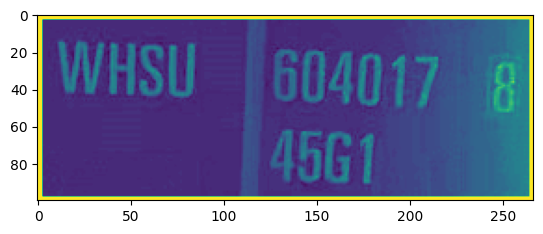

 86%|████████▌ | 30/35 [00:13<00:02,  2.15it/s]

IHSU6040173


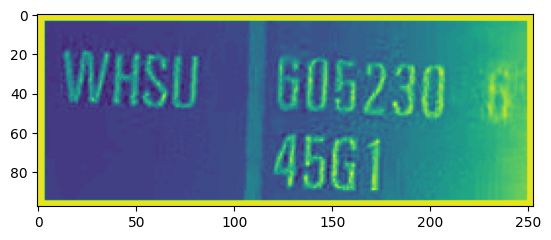

 89%|████████▊ | 31/35 [00:14<00:01,  2.12it/s]

IHSU6052301


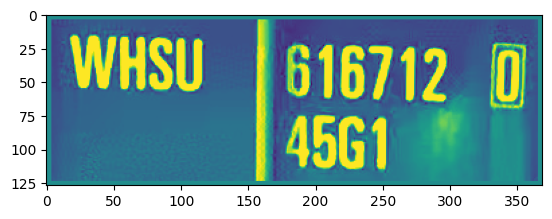

 91%|█████████▏| 32/35 [00:14<00:01,  2.05it/s]

WIRU6167129


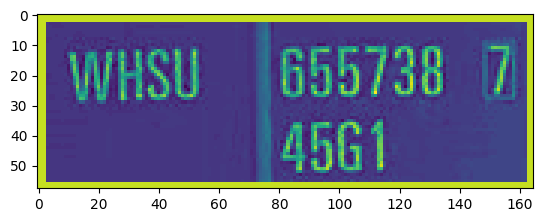

 94%|█████████▍| 33/35 [00:15<00:00,  2.23it/s]

WHSU6557387


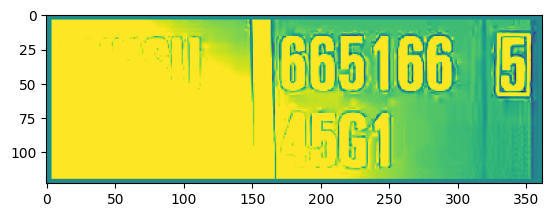

 97%|█████████▋| 34/35 [00:15<00:00,  2.17it/s]

66I6


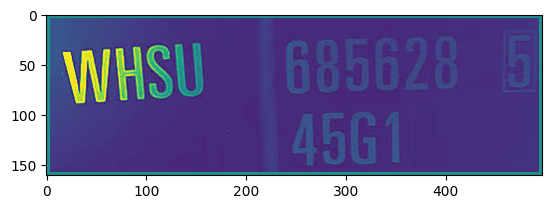

100%|██████████| 35/35 [00:16<00:00,  2.14it/s]

WHSU6856285


In [25]:
img_names = os.listdir(dir_origin_path)

for img_name in tqdm(img_names):
    
    if img_name.lower().endswith(('.bmp', '.dib', '.png', '.jpg', '.jpeg', '.pbm', '.pgm', '.ppm', '.tif', '.tiff')):
        image_path  = os.path.join(dir_origin_path, img_name)
        image       = Image.open(image_path)
        r_image ,crop ,_  = yolo.detect_image(image)
        crop_picture=r_image.crop(crop)
        crop_picture = crop_picture.convert('L')
        # 对图像进行对比度增强
        crop_picture = enhance_contrast(crop_picture, alpha, beta)

        text=reader.readtext(np.array(crop_picture), detail = 0)
        plt.imshow(crop_picture)  
        plt.show()
        #將辨識出的字組合在一起
        predict=''
        for i in text:
            predict+=i

        # 過濾字串
        text=str.upper(predict)
        cleaned_text = remove_special_characters(text)
        cleaned_text=cleaned_text[:10]
        
        #將字串轉成對應的數字，來預測第11個字
        container_text=[]
        for i in cleaned_text:
            if(str.isupper(i)):
                container_text.append(char_set[i])
            else:
                container_text.append(int(i))   
        container_text   

        #透過公式轉成對應的第11個數字
        sum=0
        for i in range(len(container_text)):
            sum+=container_text[i]*(2**i)  
        number11=sum%11    
        if sum%11==10:
            number11=0
        cleaned_text+=str(number11)
        print(cleaned_text)
        # if not os.path.exists(dir_save_path):
        #     os.makedirs(dir_save_path)
        # r_image.save(os.path.join(dir_save_path, img_name.replace(".jpg", ".png")), quality=95, subsampling=0)


['WHSU', '685628', '4561']


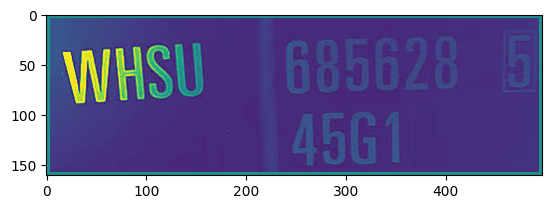

In [26]:
from PIL import ImageEnhance

def enhance_contrast(image, alpha, beta):
    # 对图像进行对比度增强
    enhanced_image = np.clip(alpha * np.array(image) + beta, 0, 255).astype(np.uint8)
    return enhanced_image

# 设置对比度增强的参数
alpha = 1.5  # 对比度增强因子
beta = 30 # 亮度增强因子


img_name=img_names[34]
image_path  = os.path.join(dir_origin_path, img_name)
image       = Image.open(image_path)
r_image ,crop ,_  = yolo.detect_image(image)
crop_picture=r_image.crop(crop)
crop_picture = crop_picture.convert('L')
# 对图像进行对比度增强
crop_picture = enhance_contrast(crop_picture, alpha, beta)
# crop_picture = adjust_brightness(crop_picture,1) 
import matplotlib.pyplot as plt
plt.imshow(crop_picture)  
text=reader.readtext(np.array(crop_picture), detail = 0)
print(text)

In [10]:
# img_name=img_names[3]
# image_path  = os.path.join(dir_origin_path, img_name)
# image       = Image.open(image_path)
# r_image ,crop   = yolo.detect_image(image)
# crop_picture=r_image.crop(crop)
# crop_picture = crop_picture.convert('L')
# import matplotlib.pyplot as plt
# import pytesseract
# plt.imshow(crop_picture)   
# # img = Image.open('img_out/image_0001.png')
# text = pytesseract.image_to_string(crop_picture, lang='eng')
# print(text)

In [11]:
import re

def remove_special_characters(text):
    # 使用正则表达式匹配除了数字和英文字母之外的字符，并替换为空字符串
    cleaned_text = re.sub('[^A-Z0-9]', '', text)
    return cleaned_text
#將辨識出的字組合在一起
predict=''
for i in text:
    predict+=i
predict  

# 過濾字串
text=str.upper(predict)
cleaned_text = remove_special_characters(text)
print(cleaned_text)  
cleaned_text=cleaned_text[:10]
cleaned_text

WHSU6856284561


'WHSU685628'

# 建立字典

In [12]:
char_set={}
ascii=65
digits=10
for i in range(26):
    if str(digits)[-1]==str(digits)[-2]:
        digits+=1
    char_set.update({chr(ascii):digits})
    ascii+=1
    digits+=1
char_set

{'A': 10,
 'B': 12,
 'C': 13,
 'D': 14,
 'E': 15,
 'F': 16,
 'G': 17,
 'H': 18,
 'I': 19,
 'J': 20,
 'K': 21,
 'L': 23,
 'M': 24,
 'N': 25,
 'O': 26,
 'P': 27,
 'Q': 28,
 'R': 29,
 'S': 30,
 'T': 31,
 'U': 32,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38}

In [13]:
#將字串轉成對應的數字，來預測第11個字
container_text=[]
for i in cleaned_text:
    if(str.isupper(i)):
        container_text.append(char_set[i])
    else:
        container_text.append(int(i))   
container_text   

#透過公式轉成對應的第11個數字
sum=0
for i in range(10):
    sum+=container_text[i]*(2**i)
sum%11    

5